# Assignment 1

### Piotr Zawiła-Niedźwiecki

#### EXERCISE 1

- The data for this exercise is found on the course page in the file sp5may.dat It has 3 columns:
log(futures price), log(spot price) and cost-of-carry (×100). The time interval is 1 minute. Let
ft and st be the log prices of future and spot respectively (from columns 1 and 2). Consider
y_{t} = f_{t}−f_{t-1} and x_{t} = s_{t} −s_{t−1}. Build a regression model, with time series errors, between {yt}
and {xt} where {yt} is the dependent variable. That is,
    * Find a model y_{t} = β_{0} + β_{1}x_{t} + eps_{t}, what are the estimates of β0 and β1?
    * Store the residuals. Try fitting an AR model to the residuals. Is ‘white noise’ a good model for the residuals? Or does an AR(p) process give a better model?

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [2]:
filepath = r"C:\Users\piotr\Desktop\sp5may.csv"

input_data = pd.read_csv(filepath, sep = "  ", engine = "python")

In [3]:
print(f"Sample data: \n {input_data.head()}")
print(f"Sample data shape: \n {input_data.shape}")
print(f"Sample data column names: \n{input_data.columns}")

Sample data: 
    lnfuture   lnspot     cost
0   6.08382  6.08618 -0.16501
1   6.08404  6.08623 -0.16501
2   6.08473  6.08630 -0.16501
3   6.08450  6.08630 -0.16501
4   6.08450  6.08623 -0.16501
Sample data shape: 
 (7061, 3)
Sample data column names: 
Index(['lnfuture', 'lnspot', 'cost'], dtype='object')


Creating columns moved by one, so we can simply subtract them from the initial ones 

In [4]:
lnfuture_column_modified = list(input_data["lnfuture"])
del lnfuture_column_modified[0]
lnfuture_column_modified.append(0)
new_lnfuture = pd.Series(lnfuture_column_modified)

lnspot_column_modified = list(input_data["lnspot"])
del lnspot_column_modified[0]
lnspot_column_modified.append(0)
new_lnspot = pd.Series(lnspot_column_modified)

Dropping last elements, because they didn't have their predeccesor

In [5]:
y_t = (input_data["lnfuture"] - new_lnfuture).drop(labels = [7060])
x_t = (input_data["lnspot"] - new_lnspot).drop(labels = [7060])
x_t = sm.add_constant(x_t)

C:\Users\piotr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Let's find estimates of parameters by performing linear regression. I do realise that most libraries give information about linear regression fits, while they fit certain Time Series. But I wanted to remind myself how to do simple Linear Regression in Python, that's the reason for below approach.

In [6]:
model = sm.OLS(y_t, x_t).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sat, 04 Apr 2020   Prob (F-statistic):          4.41e-253
Time:                        13:19:47   Log-Likelihood:                 47375.
No. Observations:                7060   AIC:                        -9.475e+04
Df Residuals:                    7058   BIC:                        -9.473e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.354e-06   3.51e-06     -0.386      0.700   -8.23e-06    5.53e-06
0              0.6212      0.018     35.420      0.000       0.587       0.656
==============================================================================
Omnibus:                     1258.852   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21697.575
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                      11.561   Cond. No.                     5.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not surprisingly our model isn't good, as the R-squared value above is pretty low. 
- Estimates are as follows:
    * β_{0} = 0.6212 
    * β_{1} = -1.354e-06
    
Now let's get the residuals:

In [7]:
predictions = model.predict(x_t)

In [8]:
residuals = y_t - predictions

In [9]:
residuals.plot()

Now let's model these residuals, and see if they are white noise. Above plot even tho at first very similar to white noise, we can see there are cases of conditional heteroscedasticity, so I'd expect some AR(q) model to fare better.

To check that I will use 3 information criterions, and see which model they would have picked.

In [10]:
aic_list = []
hqic_list = []
bic_list = []

for i in range(0,100):
    AR_model = AutoReg(residuals, i).fit()
    aic_list.append(AR_model.aic)
    hqic_list.append(AR_model.hqic)
    bic_list.append(AR_model.bic)

Minimal value of AIC criterion was:  
 -16.289909336575334 
 Which was result for model AR(45)


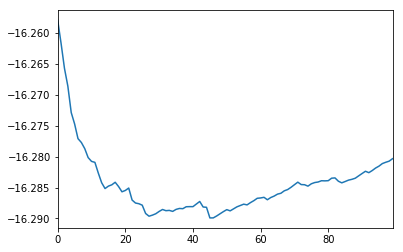

In [11]:
pd.Series(aic_list).plot()
print(f"Minimal value of AIC criterion was:  \n {min(aic_list)} \n Which was result for model AR({aic_list.index(min(aic_list))})")

Minimal value of HQIC criterion was:  
 -16.279888935101496 
 Which was result for model AR(27)


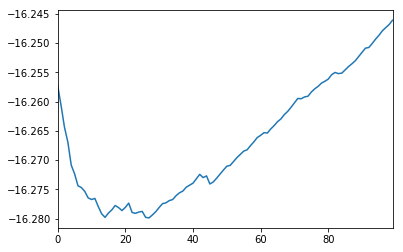

In [12]:
pd.Series(hqic_list).plot()
print(f"Minimal value of HQIC criterion was:  \n {min(hqic_list)} \n Which was result for model AR({hqic_list.index(min(hqic_list))})")

Minimal value of BIC criterion was:  
 -16.269618280724792 
 Which was result for model AR(13)


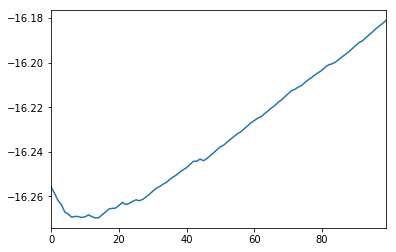

In [13]:
pd.Series(bic_list).plot()
print(f"Minimal value of BIC criterion was:  \n {min(bic_list)} \n Which was result for model AR({bic_list.index(min(bic_list))})")

So depending on which criterion we would base our decision making, we would either choose AR(13), AR(27) or AR(45). Not surprising that BIC choose the smallest model possible, while AIC was more lenient in it's approach.

#### EXERCISE 2

-  The data for this exercise is found in the file q-gdpdef.txt on the course page. It contains the
data for the United States for the first quarter of 1947 to the last quarter of 2008. Data is in
the format year, month, day and deflator. The data are seasonally adjusted and equal to 100 for
the year 2000. Build and ARIMA model for the series and check the validity of the fitted model.
Use the fitted model to predict the inflation for each quarter of 2009.

In [14]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [15]:
filepath2 = r"C:\Users\piotr\Desktop\q_gdpdef.txt"
input_data2 = pd.read_csv(filepath2, sep = " ", engine = "python")

In [16]:
input_data2.head(5)

,year,mon,day,gdpdef
0,1947,1,1,15.105
1,1947,4,1,15.329
2,1947,7,1,15.597
3,1947,10,1,15.989
4,1948,1,1,16.111


Given such data, we will only need index, and values, let's modify our data then, so it will be easily distuingishable.

In [17]:
input_data2["date"] = input_data2["year"].astype(str)+"_"+input_data2["mon"].astype(str)+"_"+input_data2["day"].astype(str)

In [18]:
input_data2.head()

,year,mon,day,gdpdef,date
0,1947,1,1,15.105,1947_1_1
1,1947,4,1,15.329,1947_4_1
2,1947,7,1,15.597,1947_7_1
3,1947,10,1,15.989,1947_10_1
4,1948,1,1,16.111,1948_1_1


So everything is as expected. Let's just remove, year, mon, day columns, and reindex our data.

In [19]:
preprocessed_data = input_data2.drop(["year", "mon", "day"], axis = 1).set_index("date")
preprocessed_data.head(5)

,gdpdef
date,
1947_1_1,15.105
1947_4_1,15.329
1947_7_1,15.597
1947_10_1,15.989
1948_1_1,16.111


So now that our preprocessing is done let's start proper modelling and exploratory analysis.

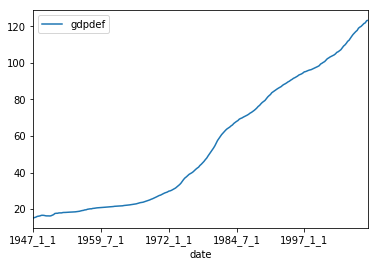

In [20]:
preprocessed_data.plot()

We can clearly see how seasonal adjustments made the plot way smoother.

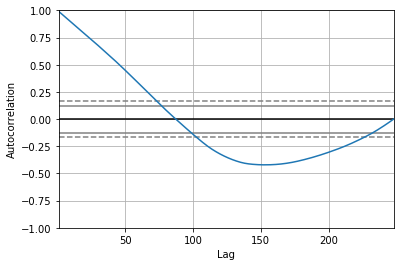

In [21]:
autocorrelation_plot(preprocessed_data)

Here we can see, that we have perhaps significant autocorrelation for around first 70 lags.

Let's start then with ARIMA(40, p,q). Below auto_arima will choose best values of those three parameters, let's use above plots to narrow down the grid search space. Although our search space is huge, and I'm not using information criterion based search, as it returned that the data wasn't supposed to be fit to ARIMA models (which surprised me as in lecture we had similar data, which was best fit for ARIMA(0,2,1)).

In [ ]:
model2 = pm.auto_arima(y = preprocessed_data, seasonal = False, n_jobs = -1, start_p = 40,max_p = 70, max_d=4, m=4 ,max_order = None, stepwise = False)

In [ ]:
not_pmdarima_model = ARIMA(preprocessed_data, order = (47,1,1))
result = not_pmdarima_model.fit()
result.summary()